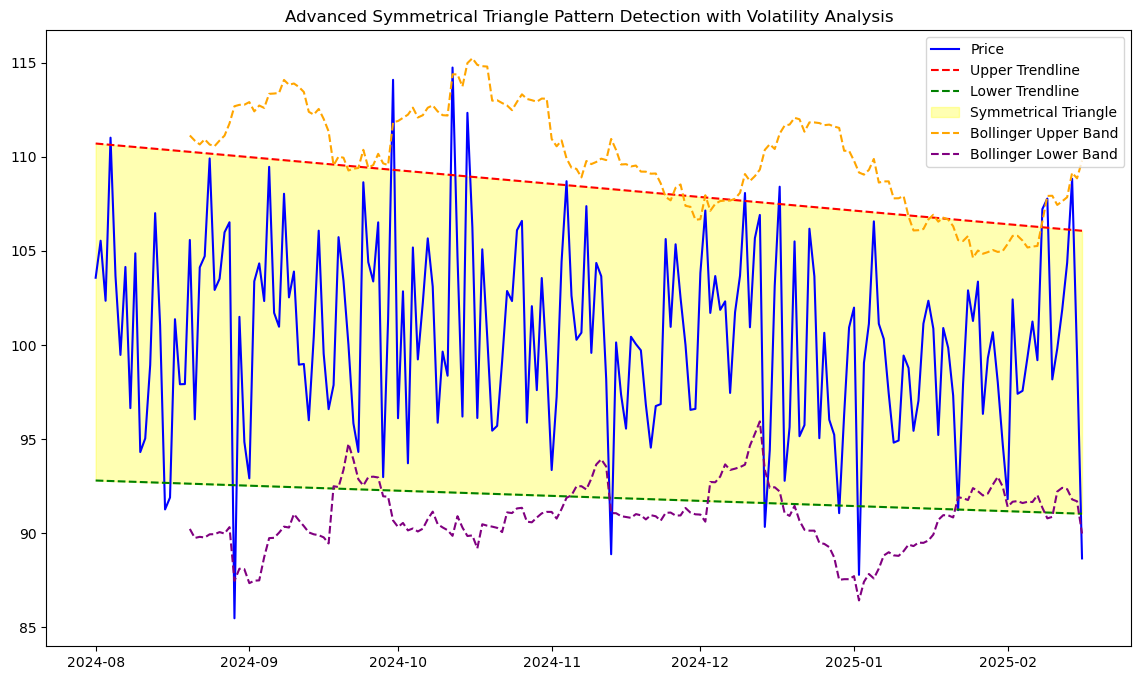

Mean Squared Error of prediction: 194.4526090479253


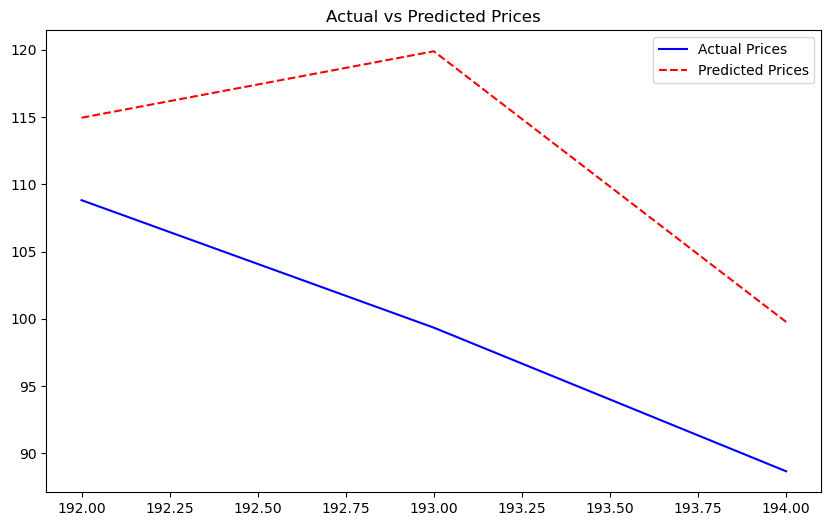

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample DataFrame (replace with your actual data)
data = pd.DataFrame({
    'Date': pd.date_range(start='8/1/2024', periods=200),
    'Close': np.random.normal(loc=100, scale=5, size=200),
    'Volume': np.random.randint(1000, 5000, size=200)  # Example volume data
})

# Calculate Bollinger Bands manually
window = 20
data['Rolling_Mean'] = data['Close'].rolling(window=window).mean()
data['Rolling_Std'] = data['Close'].rolling(window=window).std()
data['BB_upper'] = data['Rolling_Mean'] + (data['Rolling_Std'] * 2)
data['BB_lower'] = data['Rolling_Mean'] - (data['Rolling_Std'] * 2)

# Identify local maxima and minima for trendlines
max_peaks, _ = find_peaks(data['Close'], distance=20)
min_peaks, _ = find_peaks(-data['Close'], distance=20)

# Linear Regression for more accurate trendline fitting
def trendline(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model

upper_model = trendline(max_peaks, data['Close'].iloc[max_peaks])
lower_model = trendline(min_peaks, data['Close'].iloc[min_peaks])

# Generate trendlines
upper_trendline = upper_model.predict(np.arange(len(data)).reshape(-1, 1))
lower_trendline = lower_model.predict(np.arange(len(data)).reshape(-1, 1))

# Plot the price and trendlines
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Close'], label='Price', color='blue')
plt.plot(data['Date'], upper_trendline, linestyle='--', color='red', label='Upper Trendline')
plt.plot(data['Date'], lower_trendline, linestyle='--', color='green', label='Lower Trendline')

# Highlight the triangle area
plt.fill_between(data['Date'], 
                 lower_trendline.flatten(), 
                 upper_trendline.flatten(), 
                 color='yellow', alpha=0.3, label='Symmetrical Triangle')

# Plot Bollinger Bands
plt.plot(data['Date'], data['BB_upper'], linestyle='--', color='orange', label='Bollinger Upper Band')
plt.plot(data['Date'], data['BB_lower'], linestyle='--', color='purple', label='Bollinger Lower Band')

plt.title('Advanced Symmetrical Triangle Pattern Detection with Volatility Analysis')
plt.legend()
plt.show()

# Predicting Future Price Movements Using Linear Regression and Volatility
lookback_period = 20
future_days = 5

# Adding Moving Averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Feature Engineering: including trendline deviations, volatility measures, and moving averages
data['Trendline_Deviation'] = (data['Close'] - (upper_trendline + lower_trendline) / 2)
data['Volatility'] = data['BB_upper'] - data['BB_lower']

# Prepare the dataset with new features
X = data[['Trendline_Deviation', 'Volatility', 'SMA_10', 'SMA_50', 'Volume']].iloc[-lookback_period:]
y = data['Close'].shift(-future_days).iloc[-lookback_period:]

# Drop NaN values from X and y
X = X.dropna()
y = y.dropna()

# Ensure X and y have the same indices after dropping NaNs
X = X.loc[y.index]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression Model
predictive_model = LinearRegression()
predictive_model.fit(X_train, y_train)

# Predict future prices
predicted_price = predictive_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_price)
print(f"Mean Squared Error of prediction: {mse}")

# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, predicted_price, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
